In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import shuffle
%matplotlib inline
from tensorflow.keras.datasets import mnist

In [2]:
# Инициализировали карточку
tf.config.list_physical_devices()

2022-05-29 05:34:06.364767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 05:34:06.370888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 05:34:06.371330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### 0 Базовые операции.

#### 0.1 Сгенерируйте три непересекающихся гауссовых облака, используя tf.random. Визуализируйте их разным цветами, используя matplotlib.
#### 0.2 Сгенерируйте случайную матрицу 2x2, умножьте каждую точку в облаках на эту матрицу. Повторно визуализируйте облака.

2022-05-29 05:34:06.441240: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-29 05:34:06.442671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 05:34:06.443539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 05:34:06.443980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

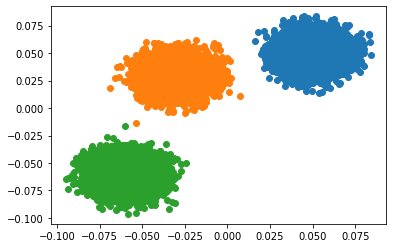

In [3]:
# Для смещения облаков
q = 0.05
a = 0.03
z = 0.06

# Формируем облака 
noise1 = tf.random.normal((6000, 2), stddev=0.01) 
noise2 = tf.random.normal((6000, 2), stddev=0.01) 
noise3 = tf.random.normal((6000, 2), stddev=0.01) 

noise1 = noise1 + tf.convert_to_tensor(np.array([q, q]),dtype='float32')
noise2 += tf.convert_to_tensor(np.array([-a, a]),dtype='float32')
noise3 += tf.convert_to_tensor(np.array([-z, -z]),dtype='float32')
noise1, noise2, noise3 = noise1.numpy(), noise2.numpy(), noise3.numpy()
plt.scatter(noise1[:, 0], noise1[:, 1])
plt.scatter(noise2[:, 0], noise2[:, 1])
plt.scatter(noise3[:, 0], noise3[:, 1])

In [4]:
matrix_ = np.random.normal(size = (2,2))
matrix_
n1_new, n2_new, n3_new = [],[],[]
for i in noise1:
    n1_new.append(np.matmul(i,matrix_))
for i in noise2:
    n2_new.append(np.matmul(i,matrix_))
for i in noise3:
    n3_new.append(np.matmul(i,matrix_))

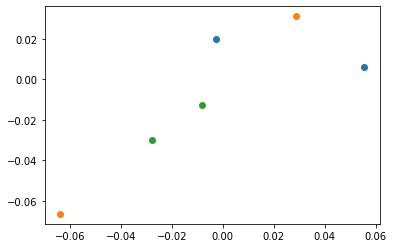

In [5]:
plt.scatter(n1_new[:][0], n1_new[:][1])
plt.scatter(n2_new[:][0], n2_new[:][1])
plt.scatter(n3_new[:][0], n3_new[:][1])

#### 1 Загрузите датасет Fashion MNIST, используя метод из tf.keras.datasets. Визуализируйте несколько изображений, используя библиотеку matplotlib.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
2


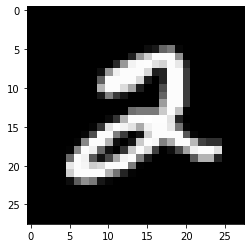

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
plt.imshow(x_train[5], cmap="gray")
print(y_train[5])


#### 2 Нормализуйте данные либо средним и СКО, либо приведя значения пикселей в интервал [-1, 1].

In [7]:
# Нормализуем данные
# Найдем среднее значение по y_train 
# и стандартное отклонение от среднего
mean, std = np.mean(x_train), np.std(x_train)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

#### 3 Создайте обучающий и тестовый TensorFlow Dataset из нормализованного набора данных. К обучающему датасету добавьте перемешивание (.shuffle). К обоим датасетам добавьте генерацию батчей размера 128 (.batch(128)).

In [8]:
# Добавили батчи в dataset_test
dataset_test = []
x_test, y_test = shuffle(x_test, y_test)
print(x_test.shape, y_test.shape)
batch_size=128
n_batches = x_test.shape[0] // batch_size
n_remains = x_test.shape[0] - n_batches * batch_size
for i in tqdm(range(n_batches)):
            x_batch = x_test[i*batch_size:(i+1)*batch_size]
            dataset_test.append(x_batch.astype('float32'))
if n_remains != 0:
                x_batch = x_test[-n_remains:]
                dataset_test.append(x_batch.astype('float32'))


dataset_train = []
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)
batch_size=128
n_batches = x_train.shape[0] // batch_size
n_remains = x_train.shape[0] - n_batches * batch_size
for i in tqdm(range(n_batches)):
            x_batch = x_train[i*batch_size:(i+1)*batch_size]
            dataset_train.append(x_batch.astype('float32'))
if n_remains != 0:
            x_batch = x_train[-n_remains:]
            dataset_train.append(x_batch.astype('float32'))
dataset_train = np.asarray(dataset_train,dtype=object)
dataset_test = np.asarray(dataset_test,dtype=object)

(10000, 28, 28) (10000,)


100%|██████████| 78/78 [00:00<00:00, 5844.88it/s]


(60000, 28, 28) (60000,)


100%|██████████| 468/468 [00:00<00:00, 5595.19it/s]


 #### 4. Напишите класс слоя Flatten, что трансформирует изображения из матричного в векторный вид: [28, 28] -> [28 * 28]. Класс слоя должен наследоваться от tf.Module. Для трансформации тензоров изображений использовать tf.reshape.

In [9]:
# Класс для решейпа и создания данных для обучения и тестирования ...
class Flatten(tf.Module):
    def __init__(self):
        print("Instance Created")

    def __call__(self,x):
        x = x.reshape(-1, 28 * 28).astype('float32')
        return x

In [10]:
flatten = Flatten()

Instance Created


In [11]:
x = flatten(dataset_train[1])

In [12]:
print(dataset_train[1].shape)
print(x.shape)

(128, 28, 28)
(128, 784)


####     5 Напишите класс линейного слоя Linear, что умножает входной вектор на матрицу весов. Класс слоя должен наследоваться от tf.Module. 

#### Матрицу весов хранить в tf.Variable. 

#### Параметры конструктора: in_d - размерность входного вектора, out_d - размерность выходного вектора. В качестве начальной инициализации весов использовать гауссово распределение с СКО=0.01.

#### 6 Напишите класс модели логистической регрессии LogisticRegression, что компонует в себе слои Linear и Flatten. 
#### Класс модели должен наследоваться от tf.Module. В качестве функции активации используйте tf.nn.softmax. 
#### Создайте объект модели и попробуйте с помощью неё классифицировать одно изображение (не забудьте о размерности батча! Она будет равна 1).

In [13]:
#Класс слоя модели 
class Linear(tf.Module):
    def __init__(self, in_d, out_d, name=None):
        # in_d - input dimensionality
        # out_d - output dimensionality
        # В случае с tf.Module вызывать конструктор родительского класса обязательно! 
        super().__init__(name=name)
        w = tf.random.normal(shape=[in_d, out_d], stddev=0.01, dtype='float32')
        self.w = tf.Variable(w, name='linear')
        self.b = tf.Variable(tf.zeros(out_d, dtype='float32') * 0.1, name='bias')
        
        
    def __call__(self, x):
        return tf.matmul(x, self.w) + self.b

class LogisticRegression(tf.Module):
    def __init__(self, in_d, out_d, name=None):
        # in_d - input dimensionality
        # out_d - output dimensionality
        super().__init__(name=name)
        linear_name = None
        if name is not None:
            linear_name = name + '_linear'
        self.linear = Linear(in_d, out_d, name=linear_name)
        self.latten_2 = Flatten()
        
    
    def __call__(self, x):
        x = self.latten_2(x)
        x = self.linear(x)
        return tf.nn.softmax(x)

In [14]:
model = LogisticRegression(28*28,10)

Instance Created


tf.Tensor(
[[0.10135067 0.07728327 0.0858284  0.12513931 0.12546209 0.08606731
  0.09718133 0.10812521 0.10544957 0.08811282]], shape=(1, 10), dtype=float32)
tf.Tensor([4], shape=(1,), dtype=int64)


2022-05-29 05:34:18.732426: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


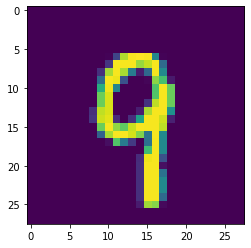

In [15]:
n =121
plt.imshow(dataset_test[1][n])
preds_test = model(dataset_test[1][n])
print(preds_test)
preds_test = tf.argmax(preds_test, axis=-1)
print(preds_test)

#### 7 Напишите функцию оценки точности модели evaluate. 

Список её аргументов: тестовый tf.Dataset, модель. 
Данная функция будет отличаться оной из лекций тем, что внутри неё не будет ручной выборки батчей из датасета, поскольку tf.Dataset уже делает это за нас.

In [16]:
def accuracy(y_true, y_pred):
    eq = tf.cast(y_true == y_pred, 'float32')
    return tf.reduce_mean(eq)
    
def evaluate(model, dataset_test):
    """
    Функция тестирования модели.
    """
    y_preds = []
    for i in tqdm(dataset_test):
        preds = model(i)
        preds = tf.argmax(preds, axis=-1)
        y_preds.append(preds)
        

    y_preds = tf.concat(y_preds, axis=0)
    return accuracy(y_test, y_preds).numpy()

#### 8 Напишите функцию обучающего шага train_step. 

Данная функция будет немного отличаться от показанной в лекции тем, что ей на вход также дается функция ошибки. 

Полный список аргументов: модель, тупл данных (батч картинок, батч меток), оптимизатор, функция ошибки. Функция train_step должна возвращать вычисленное значение функции ошибки.

В данной лабораторной функция ошибки не будет писаться заново, будет использоваться готовая кросс-энтропия из Keras.

In [17]:

def cross_entropy(labels, preds):
    """
    Вычисляет значение перекрестной энтропии (Cross-Entropy) - классическая
    функция ошибки, используемая в задаче классификации.
    """
    # Прибавление константы для улучшения численной стабильности.
    # Если не прибавлять маленькое чисто, то возможно появление nan
    log = tf.math.log(preds + 1e-4)
    onehot = tf.one_hot(labels, depth=N_CLASSES, dtype='float32')
    log = log * onehot
    log = tf.reduce_sum(log, axis=-1)
    return -tf.reduce_mean(log)


def train_step(model, data, optim,fonk_oshibk):
    """
    Функция, производящая один обучающий шаг.
    """
    with tf.GradientTape() as tape:
        # "Прогон" данных через модель и вычисление значения функции ошибки
        x, y = data
        preds = model(x)
        #print(x, preds,y)
        loss = fonk_oshibk(y, preds)
    # Вычисление градиентов
    grads = tape.gradient(loss, model.trainable_variables)
    # Применение градиентов к весам
    optim.apply_gradients(zip(grads, model.trainable_variables))
    return loss

#### 9 Оцените точность модели.

In [18]:
acc = evaluate(model, dataset_test)
print('Точность', round(acc * 100, 2), '%')

100%|██████████| 79/79 [00:00<00:00, 933.66it/s]

Точность 8.97 %


#### 10 Подготовьте гиперпараметры обучения: оптимизатор, функция ошибки

In [21]:
# Гиперпараметры обучения

optim = tf.optimizers.Adam(learning_rate=0.005)
N_CLASSES = 10
EPOCHS = 5
BATCH_SIZE = 128

n_batches = x_train.shape[0] // BATCH_SIZE
print_period = 100

####11 Напишите обучающий цикл. Цикл состоит из внешнего цикла, что отсчитывает эпохи, и вложенного, что итерируется по обучающему датасету. 

Во вложенном цикле должна вызываться функция train_step. Каждую эпоху модель должна тестироваться функцией evaluate. Должны выводиться номер эпохи, значение ошибки и точности. Сохраняйте значения ошибки и точности в списки. Обучите модель. По ходу обучения подбирайте более оптимальные гиперпараметры обучения (learning_rate, другой оптимизатор).

In [22]:
# Цикл обучения
take_data = lambda i: (dataset_train[i], y_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])

loss_data = []
acc_data = []
for epoch in range(EPOCHS):
    # Перемешивание данных. Очень часто это позволяет повысить точность модели.
    # Рекомендуется перемешивать данные всегда!  dataset_train[i]
    
    for i in tqdm(range(len(dataset_train)-1)):
        data = take_data(i)
        loss = train_step(model, data, optim, cross_entropy)
        if i % print_period == 0:
            print('Epoch:', epoch, 'Iteration:', i, 'Loss:', loss.numpy())
        loss_data.append(loss.numpy())
    print('Тестирование модели...')
    acc = evaluate(model, dataset_test)
    print('Epoch:', epoch, 'Accuracy:', acc)
    acc_data.append(acc)

  5%|▍         | 22/468 [00:00<00:04, 108.29it/s]

Epoch: 0 Iteration: 0 Loss: 2.295751


 25%|██▌       | 117/468 [00:00<00:02, 154.94it/s]

Epoch: 0 Iteration: 100 Loss: 0.18593124


 47%|████▋     | 221/468 [00:01<00:01, 168.60it/s]

Epoch: 0 Iteration: 200 Loss: 0.55288565


 69%|██████▉   | 325/468 [00:02<00:00, 167.76it/s]

Epoch: 0 Iteration: 300 Loss: 0.19133258


 92%|█████████▏| 430/468 [00:02<00:00, 171.09it/s]

Epoch: 0 Iteration: 400 Loss: 0.2787677


100%|██████████| 468/468 [00:02<00:00, 159.48it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 997.21it/s]


Epoch: 0 Accuracy: 0.9175


  4%|▍         | 18/468 [00:00<00:02, 172.41it/s]

Epoch: 1 Iteration: 0 Loss: 0.20541503


 26%|██▌       | 121/468 [00:00<00:02, 162.10it/s]

Epoch: 1 Iteration: 100 Loss: 0.116810314


 48%|████▊     | 226/468 [00:01<00:01, 164.51it/s]

Epoch: 1 Iteration: 200 Loss: 0.5327829


 70%|███████   | 328/468 [00:02<00:00, 159.43it/s]

Epoch: 1 Iteration: 300 Loss: 0.1857749


 92%|█████████▏| 432/468 [00:02<00:00, 166.91it/s]

Epoch: 1 Iteration: 400 Loss: 0.2619469


100%|██████████| 468/468 [00:02<00:00, 160.53it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 1039.64it/s]


Epoch: 1 Accuracy: 0.9206


  4%|▎         | 17/468 [00:00<00:02, 169.70it/s]

Epoch: 2 Iteration: 0 Loss: 0.19941708


 27%|██▋       | 125/468 [00:00<00:02, 169.83it/s]

Epoch: 2 Iteration: 100 Loss: 0.11177494


 49%|████▊     | 228/468 [00:01<00:01, 162.74it/s]

Epoch: 2 Iteration: 200 Loss: 0.52265006


 72%|███████▏  | 335/468 [00:01<00:00, 173.73it/s]

Epoch: 2 Iteration: 300 Loss: 0.17844942


 91%|█████████ | 425/468 [00:02<00:00, 174.33it/s]

Epoch: 2 Iteration: 400 Loss: 0.25795868


100%|██████████| 468/468 [00:02<00:00, 167.20it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 1081.98it/s]


Epoch: 2 Accuracy: 0.921


  3%|▎         | 16/468 [00:00<00:02, 159.84it/s]

Epoch: 3 Iteration: 0 Loss: 0.19447523


 28%|██▊       | 133/468 [00:00<00:02, 159.18it/s]

Epoch: 3 Iteration: 100 Loss: 0.10499449


 47%|████▋     | 218/468 [00:01<00:01, 165.37it/s]

Epoch: 3 Iteration: 200 Loss: 0.51954967


 69%|██████▉   | 325/468 [00:01<00:00, 170.72it/s]

Epoch: 3 Iteration: 300 Loss: 0.17278858


 92%|█████████▏| 432/468 [00:02<00:00, 166.69it/s]

Epoch: 3 Iteration: 400 Loss: 0.2590179


100%|██████████| 468/468 [00:02<00:00, 162.79it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 1075.93it/s]


Epoch: 3 Accuracy: 0.9204


  3%|▎         | 15/468 [00:00<00:03, 147.45it/s]

Epoch: 4 Iteration: 0 Loss: 0.1879938


 28%|██▊       | 131/468 [00:00<00:02, 161.07it/s]

Epoch: 4 Iteration: 100 Loss: 0.097691216


 47%|████▋     | 218/468 [00:01<00:01, 167.18it/s]

Epoch: 4 Iteration: 200 Loss: 0.5211884


 70%|██████▉   | 326/468 [00:01<00:00, 171.51it/s]

Epoch: 4 Iteration: 300 Loss: 0.16772424


 93%|█████████▎| 434/468 [00:02<00:00, 169.25it/s]

Epoch: 4 Iteration: 400 Loss: 0.2624412


100%|██████████| 468/468 [00:02<00:00, 163.19it/s]


Тестирование модели...


100%|██████████| 79/79 [00:00<00:00, 1031.18it/s]

Epoch: 4 Accuracy: 0.9203


#### 12 Выведите графики точности и ошибки, используя matplotlib.

In [23]:
v_1 = np.arange(0, len(loss_data), 1)
print(len(v_1))
v_2 = np.arange(0, len(acc_data), 1)
print(len(v_2))

2340
5


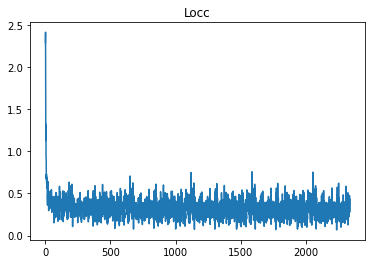

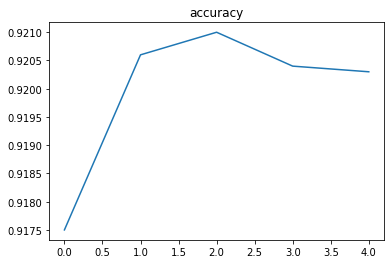

In [24]:
#График лосс и точности модели
plt.plot(v_1,loss_data)
plt.title("Locc")
plt.show()

plt.plot(v_2,acc_data)
plt.title("accuracy")
plt.show()


#### 13 (Опционально) Постройте и обучите произвольную нейронную сеть с использованием Keras для решения той же задачи.

In [25]:
#Дополню чуть позже

In [116]:
"""ckpt = tf.train.Checkpoint(model=model)
ckpt.save('model_weights')



def accuracy(y_true, y_pred):
    eq = tf.cast(y_true == y_pred, 'float32')
    return tf.reduce_mean(eq)
    
def evaluate(model, dataset_test):
    y_preds = []
    for i in tqdm(dataset_test): 
        preds = model(i)
        preds = tf.argmax(preds, axis=-1)
        y_preds.append(preds)

    y_preds = tf.concat(y_preds, axis=0)
    return accuracy(y_test, y_preds).numpy()


model2 = LogisticRegression(28*28,10)

print('До загрузки весов:', evaluate(model2, dataset_test))

ckpt2 = tf.train.Checkpoint(model=model2)
ckpt2.restore('model_weights-1')

print('После загрузки весов:', evaluate(model2, dataset_test))"""